# Chapter 16: Decision Trees

In this chapter we will implement a decision tree classifier. The decision tree will use entropy minimization for partion selection.

### Entropy

Entropy is a measure of uncertainty: the lower the entropy, the lower the uncertainty. If we have a set of data $S$ consisting of observations with a finite set of labels $C_1, C_2, \ldots C_n$. If each each class $C_i$ has corresponding proportion $p_i$,  the entropy of $S$ can then be defined as:

$\displaystyle H(S) = -p_1 \log_2(p_1) - \cdots - p_n \log_2(p_n) = - \sum_{i=1}^n p_i \log_2(p_i)$

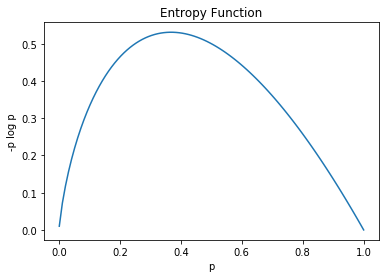

In [2]:
import math, my_utils
from collections import Counter
from matplotlib import pyplot
%matplotlib inline

def p_log_p(p):
    return -p * math.log(p, 2)

x = my_utils.linspace(0.001,1,100)
y = [p_log_p(x_i) for x_i in x]
pyplot.plot(x, y)
pyplot.title("Entropy Function")
pyplot.xlabel("p")
pyplot.ylabel("-p log p")

In [3]:
def entropy(class_probabilities):
    """Given a list of class probabilities, compute the entropy"""
    return sum(p_log_p(p)
               for p in class_probabilities if p)

def class_probabilities(labels):
    total_count = len(labels)
    return [count / total_count for count in Counter(labels).values()]

def data_entropy(labeled_data):
    labels = [label for _, label in labeled_data]
    probs = class_probabilities(labels)
    return entropy(probs)

### Entropy of a Partition